In [3]:
from pathlib import Path
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.vgg16 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt

# Paths for training and validation datasets
main_folder = Path("/content/drive/MyDrive/Monkey/MonkeyBhoi/training/training")
validation_folder = Path("/content/drive/MyDrive/Monkey/MonkeyBhoi/validation/validation")

# Declare variables for validation dataset
val_images = []
val_images_original = []
val_image_label = []

# List of class names
val_class_names = [entry.name for entry in validation_folder.iterdir() if entry.is_dir()]


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Preparing Validation Dataset
for folder in validation_folder.iterdir():
    if folder.is_dir():
        for img_path in folder.iterdir():
            # Load and preprocess images
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)

            # Save original image for display purposes
            val_images_original.append(img_array.copy())

            # Preprocess for VGG16
            img_array = preprocess_input(img_array)

            # Append processed data and labels
            val_images.append(img_array)
            val_image_label.append(val_class_names.index(folder.name))

print("Preparing Validation Dataset Completed.")

# Convert to NumPy arrays
val_images = np.array(val_images)
val_image_label = to_categorical(val_image_label)

# Print validation dataset shapes
print("Validation Dataset")
print(val_images.shape)
print(val_image_label.shape)


Preparing Validation Dataset Completed.
Validation Dataset
(314, 224, 224, 3)
(314, 11)


In [5]:
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras import layers, models

# Initialize VGG16 model
input_layer = layers.Input(shape=(224, 224, 3))
model_vgg16 = VGG16(weights='imagenet', input_tensor=input_layer, include_top=False)

# Modify the model for transfer learning
flatten = layers.Flatten()(model_vgg16.output)
output_layer = layers.Dense(10, activation='softmax')(flatten)
model = models.Model(inputs=input_layer, outputs=output_layer)

# Freeze all layers except the last one
for layer in model.layers[:-1]:
    layer.trainable = False

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])


58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [6]:
# Declare variables for training dataset
train_images = []
train_labels = []

# List of class names
train_class_names = [entry.name for entry in main_folder.iterdir() if entry.is_dir()]

# Preparing Training Dataset
for folder in main_folder.iterdir():
    if folder.is_dir():
        for img_path in folder.iterdir():
            # Load and preprocess images
            img = image.load_img(img_path, target_size=(224, 224))
            img_array = image.img_to_array(img)

            # Preprocess for VGG16
            img_array = preprocess_input(img_array)

            # Append processed data and labels
            train_images.append(img_array)
            train_labels.append(train_class_names.index(folder.name))

print("Preparing Training Dataset Completed.")

# Convert to NumPy arrays
x = np.array(train_images)
y = to_categorical(train_labels)

# Print training dataset shapes
print("Training Dataset")
print(x.shape)
print(y.shape)


Preparing Training Dataset Completed.
Training Dataset
(1250, 224, 224, 3)
(1250, 11)


In [7]:
print(f"Number of training classes: {len(train_class_names)}")
print(f"Number of validation classes: {len(val_class_names)}")


Number of training classes: 11
Number of validation classes: 11


In [8]:
# Correct the number of output units to match the number of classes
num_classes = len(train_class_names)  # Dynamically calculate the number of classes
output_layer = layers.Dense(num_classes, activation='softmax')(flatten)
model = models.Model(inputs=input_layer, outputs=output_layer)

# Compile the model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

print(f"Model output layer updated to {num_classes} classes.")


Model output layer updated to 11 classes.


In [9]:
from sklearn.model_selection import train_test_split

# Example training data placeholders (replace `x` and `y` with actual data)
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.2, random_state=5)

# Train the model
model.fit(xtrain, ytrain, epochs=20, batch_size=128, verbose=True, validation_data=(xtest, ytest))


Epoch 1/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 107s 10s/step - accuracy: 0.3219 - loss: 27.0463 - val_accuracy: 0.7640 - val_loss: 7.4358
Epoch 2/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 41s 636ms/step - accuracy: 0.9277 - loss: 1.7954 - val_accuracy: 0.8640 - val_loss: 4.6687
Epoch 3/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 645ms/step - accuracy: 0.9766 - loss: 0.4106 - val_accuracy: 0.8920 - val_loss: 3.8883
Epoch 4/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 5s 674ms/step - accuracy: 0.9975 - loss: 0.0161 - val_accuracy: 0.8960 - val_loss: 3.6736
Epoch 5/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 671ms/step - accuracy: 0.9988 - loss: 0.0207 - val_accuracy: 0.9000 - val_loss: 3.3246
Epoch 6/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 656ms/step - accuracy: 0.9993 - loss: 0.0036 - val_accuracy: 0.9120 - val_loss: 3.0496
Epoch 7/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 657ms/step - accuracy: 0.9993 - loss: 0.0016 - val_accuracy: 0.9200 - val_loss: 3.0665
Epoch 8/20
8/8 ━━━━━━━━━━━━━━━━━━━━ 10s 687ms/step - accuracy: 1.0000 - loss: 4.2391e-06 - val_accuracy: 0.9160 -

In [10]:
class_names = train_class_names  # or val_class_names if you're using the validation dataset

In [11]:
def Get_Species_Type(class_name):
    # Mapping of class names to species types
    species_mapping = {
        "n0": "Mantled Howler",
        "n1": "Patas Monkey",
        "n2": "Bald Uakari",
        "n3": "Japanese Macaque",
        "n4": "Pygmy Marmoset",
        "n5": "White Headed Capuchin",
        "n6": "Silvery Marmoset",
        "n7": "Common Squirrel Monkey",
        "n8": "Black Headed Night Monkey",
        "n9": "Nilgiri Langur",
        "n10": "Baboon",
    }
    # Return the species type for the given class name
    return species_mapping.get(class_name, "Unknown Species")


In [12]:
def predict(img_name):
    img = image.load_img(img_name, target_size=(224, 224))
    img_array = image.img_to_array(img)
    plt.imshow(img_array.astype('int32'))
    plt.show()

    img_array = preprocess_input(img_array)
    prediction = model.predict(img_array.reshape(1, 224, 224, 3))
    output = np.argmax(prediction)
    print(f"{class_names[output]}: {Get_Species_Type(class_names[output])}")


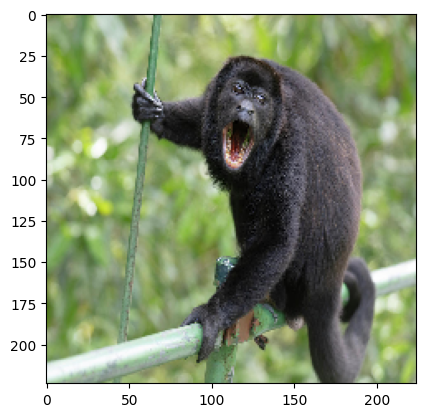

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
n0: Mantled Howler


In [18]:
predict('/content/drive/MyDrive/male-mantled-howler-monkey-on-foot-bridge-costa-rica-doug-wechsler-natureplcom.jpg')